<a href="https://colab.research.google.com/github/nitish6121999/CNN-project-Cat-vs-Dog-Classification/blob/main/Cat_vs_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN project

##Cat vs dog classification

In this deep learning project, we developed a Convolutional Neural Network (CNN) model to classify images of cats and dogs. The goal was to build an accurate and robust classifier that can distinguish between the two classes.

![](https://editor.analyticsvidhya.com/uploads/25366Convolutional_Neural_Network_to_identify_the_image_of_a_bird.png)

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

### Dataset loading

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 44.1MB/s]
100% 1.06G/1.06G [00:28<00:00, 39.6MB/s]


### Extract data from Zipfile

In [3]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

## **Generators**
 In the context of machine learning, a generator is an iterable that generates data on-the-fly, rather than loading it all into memory at once. This is particularly useful when dealing with large datasets that do not fit entirely in RAM.

In [7]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',       #path
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [8]:
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',       #path
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


Now,the images are stored in numpy array format,where the numbers are between 0-255,we have to get it down between 0-1

In [10]:
#Normalize
def process(image,label):
  image= tf.cast(image/255,tf.float32)
  return image,label



In [11]:
#now the images are in the size of range 0-1
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

# **CNN Model**

![](https://media.licdn.com/dms/image/D5612AQGOui8XZUZJSA/article-cover_image-shrink_600_2000/0/1680532048475?e=2147483647&v=beta&t=lq9rK8QDs1MZQW97PR4XccMUtqoERS7_eKFqIxRZuPo)

CNN Architecture

In [15]:
model=Sequential()

#convolution layers and pooling
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Flatten layers
model.add(Flatten())

#Fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 128)     

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [23]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 75s 99ms/step - loss: 0.6061 - accuracy: 0.6606 - val_loss: 0.5407 - val_accuracy: 0.7336
Epoch 2/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4680 - accuracy: 0.7714 - val_loss: 0.4375 - val_accuracy: 0.7988
Epoch 3/10
625/625 [==============================] - 75s 119ms/step - loss: 0.3599 - accuracy: 0.8371 - val_loss: 0.4411 - val_accuracy: 0.8056
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2313 - accuracy: 0.9026 - val_loss: 0.5851 - val_accuracy: 0.7944
Epoch 5/10
625/625 [==============================] - 59s 93ms/step - loss: 0.1204 - accuracy: 0.9544 - val_loss: 0.9829 - val_accuracy: 0.7704
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0705 - accuracy: 0.9748 - val_loss: 0.9288 - val_accuracy: 0.7908
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0550 - accuracy: 0.9817 - val_loss: 0.9720 - val_accu

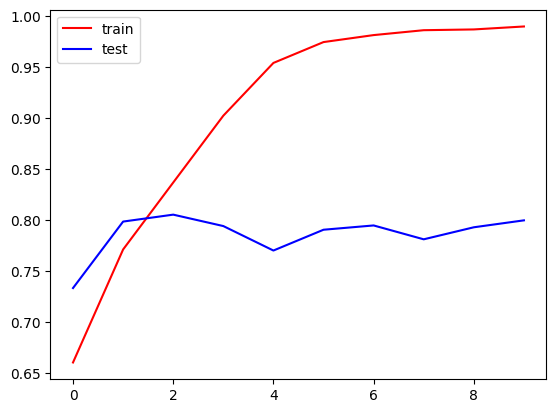

In [24]:
# Train accuracy and Test accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

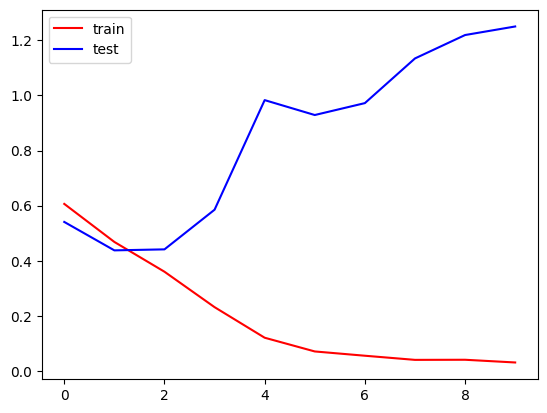

In [25]:
# Train loss and Test loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

**Overfittig of the model is taking place**

* loss: 0.0305

  val_loss: 1.2502

* accuracy: 0.9901  
  val_accuracy: 0.8000


## Ways to reduce overfitting

*   Add more data
*   Data augumentation
*   Drop out regularization
*   Batch normalize
*   Weights initialise
*   Reduce Complexity




## Testing on new data

In [26]:
import cv2

In [35]:
test_img=cv2.imread('/content/dog.jpeg')

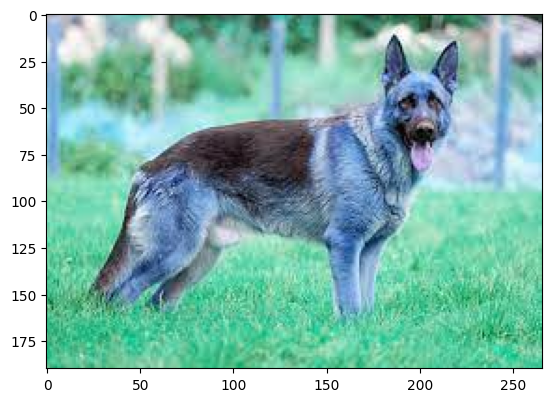

In [36]:
plt.imshow(test_img)

In [37]:
test_img.shape

(190, 266, 3)

In [38]:
test_img=cv2.resize(test_img,(256,256))

we used to pass data in batches for model,now that we have only one image we will write it has (1,256,256,3)

In [39]:
test_input=test_img.reshape((1,256,256,3))

In [41]:
# Cats=0 and Dogs=1
model.predict(test_input)

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)

# Thankyou